# LUNG CANCER PREDICTION MODEL


The effectiveness of cancer prediction system helps the people to know their cancer risk with low cost and it also helps the people to take the appropriate decision based on their cancer risk status. The data is collected from the website online lung cancer prediction system.

Attribute information:

Gender: M(male), F(female)
Age: Age of the patient
Smoking: YES=2 , NO=1.
Yellow fingers: YES=2 , NO=1.
Anxiety: YES=2 , NO=1.
Peer_pressure: YES=2 , NO=1.
Chronic Disease: YES=2 , NO=1.
Fatigue: YES=2 , NO=1.
Allergy: YES=2 , NO=1.
Wheezing: YES=2 , NO=1.
Alcohol: YES=2 , NO=1.
Coughing: YES=2 , NO=1.
Shortness of Breath: YES=2 , NO=1.
Swallowing Difficulty: YES=2 , NO=1.
Chest pain: YES=2 , NO=1.
Lung Cancer: YES , NO.

In [682]:
# import necessary libraries
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix

/kaggle/input/lung-cancer/survey lung cancer.csv# DATA IMPORTATION

In [685]:
# parsing the data into a dataframe
df = pd.read_csv("survey lung cancer.csv")
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


# DATA WRANGLING

In [688]:
df.shape

(465, 16)

The dataset has 308 rows and 16 attribute

In [691]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 465 non-null    object
 1   AGE                    465 non-null    int64 
 2   SMOKING                465 non-null    int64 
 3   YELLOW_FINGERS         465 non-null    int64 
 4   ANXIETY                465 non-null    int64 
 5   PEER_PRESSURE          465 non-null    int64 
 6   CHRONIC DISEASE        465 non-null    int64 
 7   FATIGUE                465 non-null    int64 
 8   ALLERGY                465 non-null    int64 
 9   WHEEZING               465 non-null    int64 
 10  ALCOHOL CONSUMING      465 non-null    int64 
 11  COUGHING               465 non-null    int64 
 12  SHORTNESS OF BREATH    465 non-null    int64 
 13  SWALLOWING DIFFICULTY  465 non-null    int64 
 14  CHEST PAIN             465 non-null    int64 
 15  LUNG_CANCER            

In [693]:
# check for duplicate values
df.duplicated().sum()

33

In [695]:
df.drop_duplicates(inplace=True)

In [697]:
# check for null values
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

There are no null values.

# EXPLORATORY DATA ANALYSIS

In [701]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000
mean,62.275463,1.527778,1.548611,1.497685,1.504630,1.513889,1.604167,1.530093,1.530093,1.532407,1.548611,1.583333,1.479167,1.537037
std,10.600991,0.499807,0.498208,0.500574,0.500558,0.500387,0.489596,0.499672,0.499672,0.499527,0.498208,0.493578,0.500145,0.499204
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,56.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,70.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


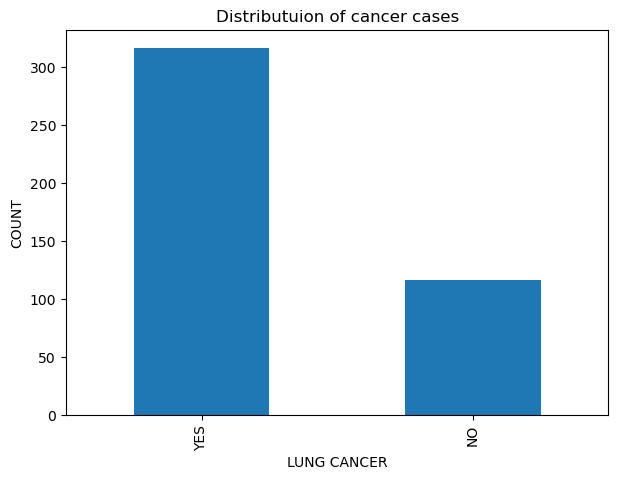

In [703]:
plt.figure(figsize=(7,5))
df['LUNG_CANCER'].value_counts().plot(kind="bar")
plt.xlabel("LUNG CANCER")
plt.ylabel("COUNT")
plt.title("Distributuion of cancer cases")
plt.show()

This shows that the dataset has an higher number of positive lung cancer cases than negative cases.

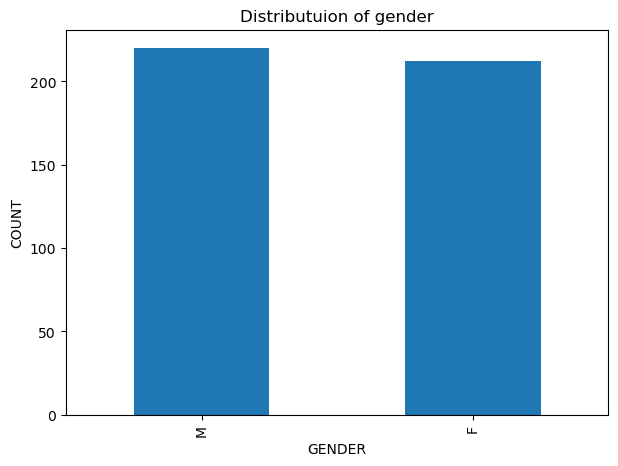

In [706]:
plt.figure(figsize=(7,5))
df['GENDER'].value_counts().plot(kind="bar")
plt.xlabel("GENDER")
plt.ylabel("COUNT")
plt.title("Distributuion of gender")
plt.show()

The gender distribution is almost equal. There is only a slight difference.

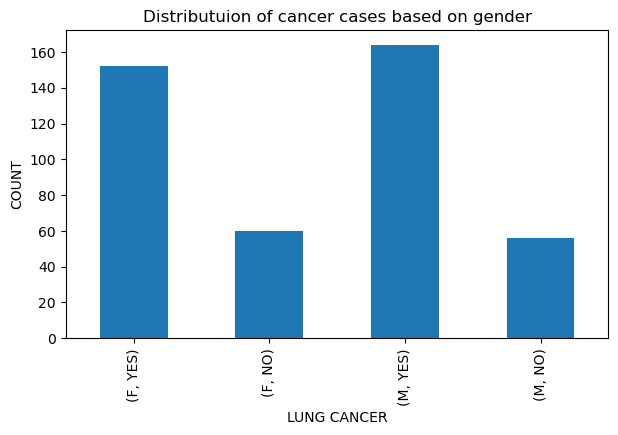

In [709]:
plt.figure(figsize=(7,4))
df['LUNG_CANCER'].groupby(df["GENDER"]).value_counts().plot(kind="bar")
plt.xlabel("LUNG CANCER")
plt.ylabel("COUNT")
plt.title("Distributuion of cancer cases based on gender")
plt.show()

This shows that there are 113 females have cancer, 21 females do not have cancer, 125 males have cancer and 17 males do not have.

In [712]:
# creating a function
def countplot(x, y, title, data=df):
    """
    Function to plot a countplot

    x: variable(1)
    y: variables(2)
    title: title for the countplot
    data: dataframe
    """
    plt.figure(figsize=(7,4))
    sns.countplot(data=df, x=x, hue=y)
    plt.title(title, fontsize=14)
    plt.show()

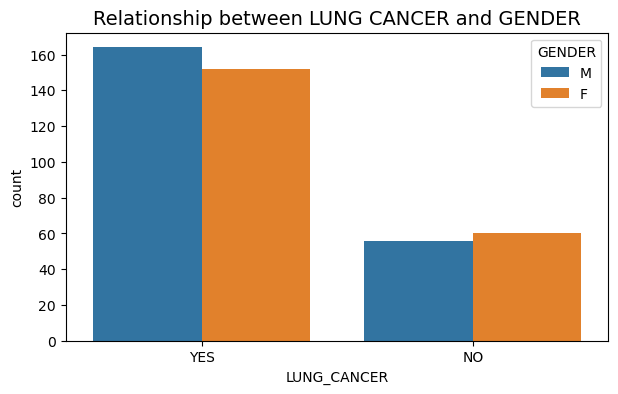

In [714]:
countplot(x="LUNG_CANCER", y="GENDER", title="Relationship between LUNG CANCER and GENDER")

This shows more males have lung cancer than females.

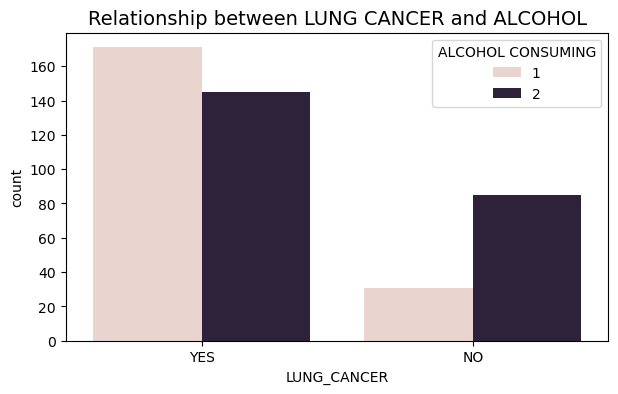

In [717]:
countplot(x="LUNG_CANCER", y="ALCOHOL CONSUMING", title="Relationship between LUNG CANCER and ALCOHOL")

A larger number of people that consumed alcohol developed lung cancer and only a few did not have lung cancer. Could alochol consumption be a risk factor?? 

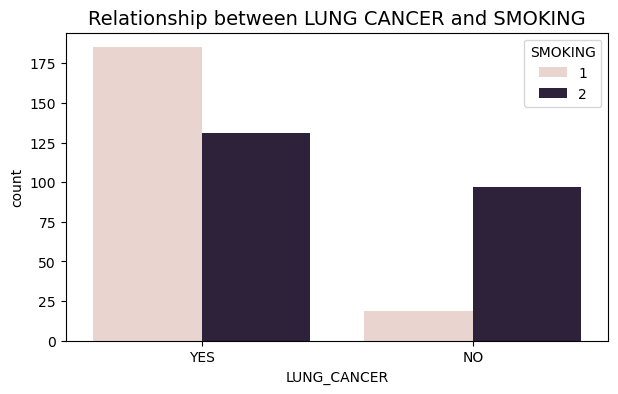

In [720]:
countplot(x="LUNG_CANCER", y="SMOKING", title="Relationship between LUNG CANCER and SMOKING")

A greater number of people that smokes developed lung cancer and only a few did not have lung cancer. Smoking has always being believed to be a risk factor of lung cancer.

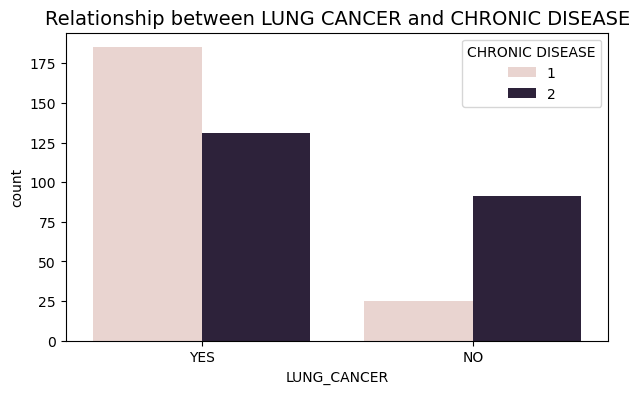

In [723]:
countplot(x="LUNG_CANCER", y="CHRONIC DISEASE", title="Relationship between LUNG CANCER and CHRONIC DISEASE")

This shows that a good number of people who have a chronic disease also developed lung cancer. this could be as a result of immunosuppression that occurs in people with chronic diseases.

Доступные столбцы: Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')


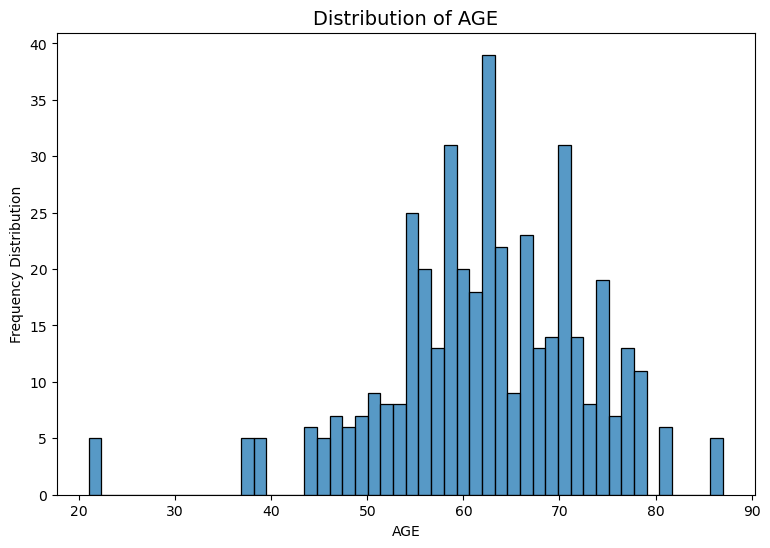

In [726]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Предполагаем, что ваш датафрейм уже загружен как df
# df = pd.read_csv("ваш_файл.csv")  # Загрузите свои данные, если это необходимо

# Выведем все имена столбцов для проверки
print("Доступные столбцы:", df.columns)

# Проверим, есть ли столбец 'AGE' (в любом регистре)
column_name = None
for col in df.columns:
    if col.lower() == 'age':
        column_name = col
        break

if column_name:
    # Если столбец 'AGE' найден, строим график
    plt.figure(figsize=(9,6))
    sns.histplot(df[column_name], bins=50)
    plt.xlabel("AGE")
    plt.ylabel("Frequency Distribution")
    plt.title("Distribution of AGE", fontsize=14)
    plt.show()
else:
    print("Столбец 'AGE' не найден в датафрейме.")


The age distribution curve does not show a normal gaussian curve.

# DATA PREPROCESSING

There is need to group the "AGE" column so as to reduce the number of unique values and help our model perform better.

In [731]:
print("minimum age is:", df['AGE'].min())
print("maximum age is:", df['AGE'].max())

minimum age is: 21
maximum age is: 87


In [733]:
bins = [20, 30, 40, 50, 60, 70, 80, 90]
labels = ['21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']
# Create a new column 'AGE_GROUP' based on the specified bins and labels
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=bins, labels=labels, right=False)
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,AGE_GROUP
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES,61-70
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES,71-80
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO,51-60
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO,61-70
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO,61-70


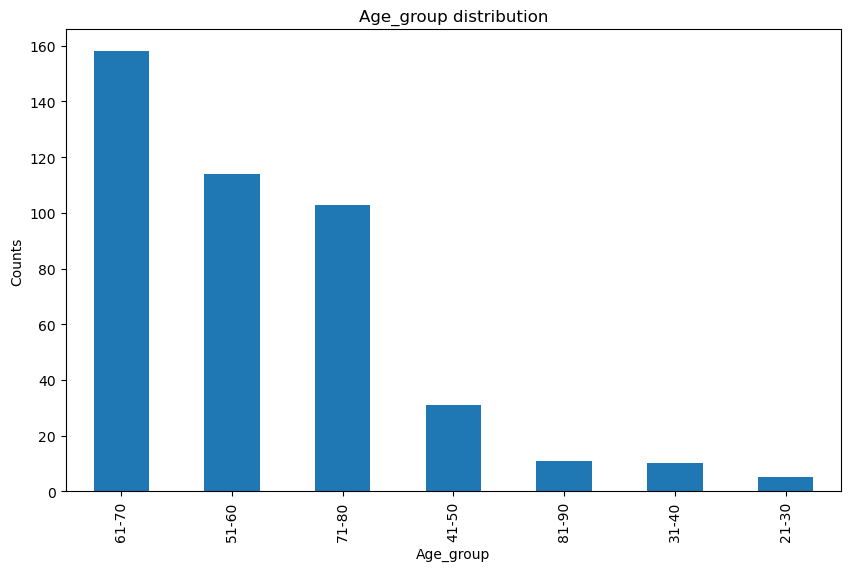

In [735]:
df['AGE_GROUP'].value_counts().plot(kind="bar")
plt.xlabel("Age_group")
plt.ylabel("Counts")
plt.title("Age_group distribution")
plt.show()

This shows that the dataset has majority of cases between the ages 61 and 70

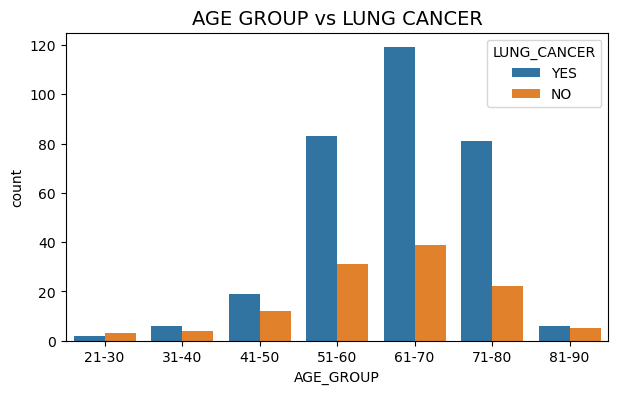

In [738]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x="AGE_GROUP", hue="LUNG_CANCER")
plt.title("AGE GROUP vs LUNG CANCER", fontsize=14)
plt.show()

There are more positives cases recorded for ages between 61-70. This could be due to age_group 61-70 being the majority of the data collected or due to old-age being a great risk factor.

In [741]:
df.drop(["AGE"], axis=1, inplace=True)
df.head()

,GENDER,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,AGE_GROUP
0,M,1,2,2,1,1,2,1,2,2,2,2,2,2,YES,61-70
1,M,2,1,1,1,2,2,2,1,1,1,2,2,2,YES,71-80
2,F,1,1,1,2,1,2,1,2,1,2,2,1,2,NO,51-60
3,M,2,2,2,1,1,1,1,1,2,1,1,2,2,NO,61-70
4,F,1,2,1,1,1,1,1,2,1,2,2,1,1,NO,61-70


In [743]:
# To get the data types of each column
df.dtypes

GENDER                     object
SMOKING                     int64
YELLOW_FINGERS              int64
ANXIETY                     int64
PEER_PRESSURE               int64
CHRONIC DISEASE             int64
FATIGUE                     int64
ALLERGY                     int64
WHEEZING                    int64
ALCOHOL CONSUMING           int64
COUGHING                    int64
SHORTNESS OF BREATH         int64
SWALLOWING DIFFICULTY       int64
CHEST PAIN                  int64
LUNG_CANCER                object
AGE_GROUP                category
dtype: object

Since "GENDER" column is in object type there is need to convert to integer. 1 being male and 0 being female.

In [746]:
df['GENDER'] = df['GENDER'].map({'M':1,'F':0})
df['GENDER'].head()

0    1
1    1
2    0
3    1
4    0
Name: GENDER, dtype: int64

The target column "LUNG_CANCER" is also in object type. YES=1, NO=0.

In [749]:
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'YES':1,'NO':0})
df['LUNG_CANCER'].head()

0    1
1    1
2    0
3    0
4    0
Name: LUNG_CANCER, dtype: int64

Lastly, the age_group is in category type, there is need to hot-encode this column.

In [752]:
df1 = pd.get_dummies(df, dtype=int)
df1.head()

,GENDER,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,...,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,AGE_GROUP_21-30,AGE_GROUP_31-40,AGE_GROUP_41-50,AGE_GROUP_51-60,AGE_GROUP_61-70,AGE_GROUP_71-80,AGE_GROUP_81-90
0,1,1,2,2,1,1,2,1,2,2,...,2,2,1,0,0,0,0,1,0,0
1,1,2,1,1,1,2,2,2,1,1,...,2,2,1,0,0,0,0,0,1,0
2,0,1,1,1,2,1,2,1,2,1,...,1,2,0,0,0,0,1,0,0,0
3,1,2,2,2,1,1,1,1,1,2,...,2,2,0,0,0,0,0,1,0,0
4,0,1,2,1,1,1,1,1,2,1,...,1,1,0,0,0,0,0,1,0,0


### Train test split

In [755]:
X = df1.drop(["LUNG_CANCER"], axis=1)
y = df1["LUNG_CANCER"]
X.head()

,GENDER,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,...,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,AGE_GROUP_21-30,AGE_GROUP_31-40,AGE_GROUP_41-50,AGE_GROUP_51-60,AGE_GROUP_61-70,AGE_GROUP_71-80,AGE_GROUP_81-90
0,1,1,2,2,1,1,2,1,2,2,...,2,2,2,0,0,0,0,1,0,0
1,1,2,1,1,1,2,2,2,1,1,...,2,2,2,0,0,0,0,0,1,0
2,0,1,1,1,2,1,2,1,2,1,...,2,1,2,0,0,0,1,0,0,0
3,1,2,2,2,1,1,1,1,1,2,...,1,2,2,0,0,0,0,1,0,0
4,0,1,2,1,1,1,1,1,2,1,...,2,1,1,0,0,0,0,1,0,0


In [757]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: LUNG_CANCER, dtype: int64

In [759]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
(X_train.shape), (y_train.shape), (X_test.shape), (y_test.shape)

((302, 21), (302,), (130, 21), (130,))

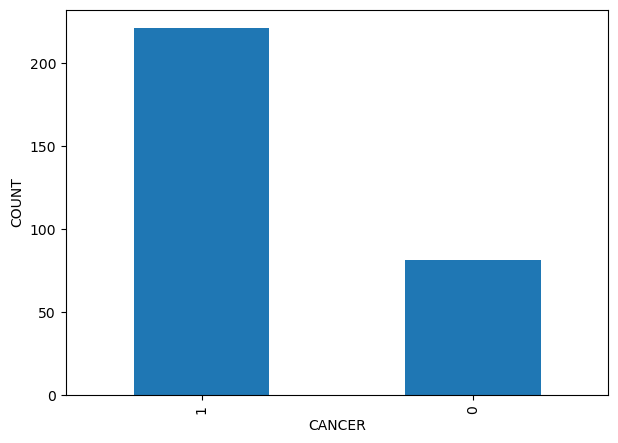

In [761]:
plt.figure(figsize=(7,5))
y_train.value_counts().plot(kind="bar")
plt.xlabel("CANCER")
plt.ylabel("COUNT")
plt.show()








This graph shows that the train data is imbalanced, there is need to perform oversampling.

### Data Oversampling

In [765]:
# instantiate Oversampler
sample = RandomOverSampler()
X_train_oversampled, y_train_oversampled = sample.fit_resample(X_train, y_train)
(X_train_oversampled.shape), (y_train_oversampled.shape)

((442, 21), (442,))

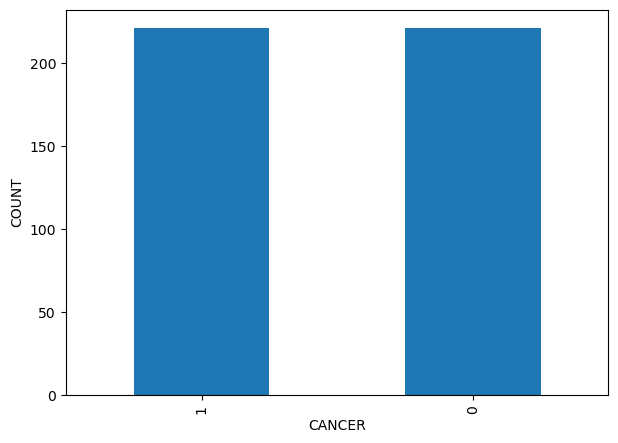

In [767]:
plt.figure(figsize=(7,5))
y_train_oversampled.value_counts().plot(kind="bar")
plt.xlabel("CANCER")
plt.ylabel("COUNT")
plt.show()

### Data Normalization

In [770]:
# instantiate MinMaxScaler
scale = MinMaxScaler()
scaled = scale.fit_transform(X_train_oversampled)
X_train_scaled = pd.DataFrame(scaled, columns=(X_train.columns))
X_test_scaled = pd.DataFrame(scale.transform(X_test), columns=(X_test.columns))
X_train_scaled.head()

,GENDER,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,...,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,AGE_GROUP_21-30,AGE_GROUP_31-40,AGE_GROUP_41-50,AGE_GROUP_51-60,AGE_GROUP_61-70,AGE_GROUP_71-80,AGE_GROUP_81-90
0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# MODEL SELECTION

In [773]:
# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile the model
model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=[tf.keras.metrics.Recall()]  # Обернута в список
              )
# fit model
history = model.fit(X_train_scaled, y_train_oversampled, epochs=150)


Epoch 1/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - loss: 0.7180 - recall_5: 0.8898
Epoch 2/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - loss: 0.6870 - recall_5: 0.8443
Epoch 3/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - loss: 0.6668 - recall_5: 0.8108
Epoch 4/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - loss: 0.6626 - recall_5: 0.7295
Epoch 5/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - loss: 0.6621 - recall_5: 0.7312
Epoch 6/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - loss: 0.6523 - recall_5: 0.7602
Epoch 7/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - loss: 0.6473 - recall_5: 0.8167
Epoch 8/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - loss: 0.6387 - recall_5: 0.8100
Epoch 9/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - loss: 0.6356 - recall_5: 0.7949
Epoch 10/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - loss: 0.6249 - recall_5: 0.8394
Epoch 11/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - loss: 0.6179 - recall_5: 0.8483
Epoch 12/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0

# MODEL EVALUATION

In [775]:
model.evaluate(X_test_scaled, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - loss: 0.5080 - recall_5: 0.8936


[0.5409281849861145, 0.8842105269432068]

In [776]:
y_hat = model.predict(X_test_scaled)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [777]:
y_pred = []
for i in y_hat:
    if i >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [778]:
y_pred[:5]

[1, 1, 0, 1, 1]

In [779]:
len(y_hat) == len(y_pred)

True

In [780]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.66      0.67        35
           1       0.88      0.88      0.88        95

    accuracy                           0.82       130
   macro avg       0.78      0.77      0.77       130
weighted avg       0.82      0.82      0.82       130



The recall_score metric was used due to the desire to have lesser number of false negatives.
Being a medical context, it is safer to err on the side of caution as all predicted cases of lung cancer would be further evaluated by a medical practitioner.
A false negative result in the real world would create an illusion of being free from lung cancer and hence there would be no further testing to ascertain the result which could be really harmful.

#### Confusion Matrix

In [790]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

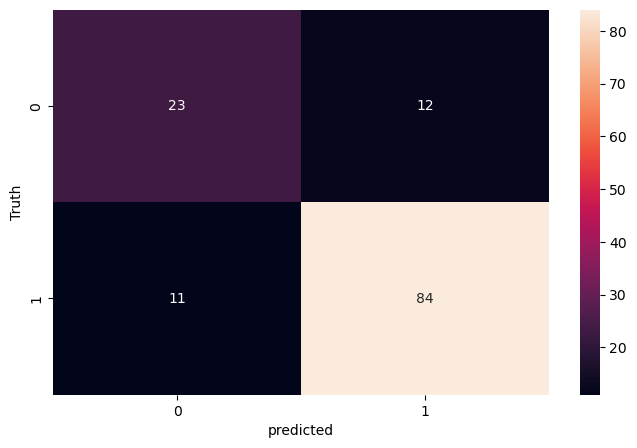

In [792]:
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("predicted")
plt.ylabel("Truth")
plt.show()

This report shows:
True positives: 70,
True negatives: 8,
False postives: 0,
False negatives: 5

In [797]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [799]:
y_pred = model.predict(X_test)

In [801]:
df 

,GENDER,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,AGE_GROUP
0,1,1,2,2,1,1,2,1,2,2,2,2,2,2,1,61-70
1,1,2,1,1,1,2,2,2,1,1,1,2,2,2,1,71-80
2,0,1,1,1,2,1,2,1,2,1,2,2,1,2,0,51-60
3,1,2,2,2,1,1,1,1,1,2,1,1,2,2,0,61-70
4,0,1,2,1,1,1,1,1,2,1,2,2,1,1,0,61-70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,0,2,2,2,2,2,2,2,2,2,2,2,2,2,0,31-40
461,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,81-90
462,0,2,2,2,2,2,2,2,2,2,2,2,2,2,0,81-90
463,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,41-50


In [803]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Пример истинных и предсказанных значений
# y_test - истинные метки, y_pred - предсказанные моделью
# Эти переменные должны быть определены после обучения модели

# Основные метрики
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # 'weighted' для учета дисбаланса классов
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Confusion Matrix и Classification Report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Вывод метрик
print(f"Точность (Accuracy): {accuracy:.2f}")
print(f"Точность (Precision): {precision:.2f}")
print(f"Полнота (Recall): {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print("\nМатрица ошибок (Confusion Matrix):")
print(conf_matrix)
print("\nОтчет о классификации (Classification Report):")
print(class_report)


Точность (Accuracy): 0.81
Точность (Precision): 0.80
Полнота (Recall): 0.81
F1-score: 0.80

Матрица ошибок (Confusion Matrix):
[[21 14]
 [11 84]]

Отчет о классификации (Classification Report):
              precision    recall  f1-score   support

           0       0.66      0.60      0.63        35
           1       0.86      0.88      0.87        95

    accuracy                           0.81       130
   macro avg       0.76      0.74      0.75       130
weighted avg       0.80      0.81      0.80       130



In [815]:
import numpy as np

def predict_lung_cancer(model):
    print("Введите данные:")
    GENDER = int(input("GENDER (0 - Female, 1 - Male): "))
    SMOKING = int(input("SMOKING (1 - Yes, 2 - No): "))
    YELLOW_FINGERS = int(input("YELLOW_FINGERS (1 - Yes, 2 - No): "))
    ANXIETY = int(input("ANXIETY (1 - Yes, 2 - No): "))
    PEER_PRESSURE = int(input("PEER_PRESSURE (1 - Yes, 2 - No): "))
    CHRONIC_DISEASE = int(input("CHRONIC DISEASE (1 - Yes, 2 - No): "))
    FATIGUE = int(input("FATIGUE (1 - Yes, 2 - No): "))
    ALLERGY = int(input("ALLERGY (1 - Yes, 2 - No): "))
    WHEEZING = int(input("WHEEZING (1 - Yes, 2 - No): "))
    ALCOHOL_CONSUMING = int(input("ALCOHOL CONSUMING (1 - Yes, 2 - No): "))
    COUGHING = int(input("COUGHING (1 - Yes, 2 - No): "))
    SHORTNESS_OF_BREATH = int(input("SHORTNESS OF BREATH (1 - Yes, 2 - No): "))
    SWALLOWING_DIFFICULTY = int(input("SWALLOWING DIFFICULTY (1 - Yes, 2 - No): "))
    CHEST_PAIN = int(input("CHEST PAIN (1 - Yes, 2 - No): "))
    
    # One-hot encoding для AGE_GROUP
    print("Выберите возрастную группу:")
    age_groups = ['21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']
    for i, group in enumerate(age_groups):
        print(f"{i}: {group}")
    AGE_GROUP = int(input("Введите номер группы: "))

    # One-hot encoding для возраста
    age_group_encoded = [1 if i == AGE_GROUP else 0 for i in range(len(age_groups))]

    # Объединение всех данных в массив
    input_data = np.array([[
        GENDER, SMOKING, YELLOW_FINGERS, ANXIETY, PEER_PRESSURE,
        CHRONIC_DISEASE, FATIGUE, ALLERGY, WHEEZING, ALCOHOL_CONSUMING,
        COUGHING, SHORTNESS_OF_BREATH, SWALLOWING_DIFFICULTY, CHEST_PAIN
    ] + age_group_encoded])

    # Проверка размерности
    if input_data.shape[1] != model.n_features_in_:
        print(f"Ошибка: Количество признаков в модели ({model.n_features_in_}) не совпадает с входными данными ({input_data.shape[1]}).")
        return

    # Предсказание
    prediction = model.predict(input_data)
    print("Результат предсказания: Легочный рак" if prediction[0] == 1 else "Результат предсказания: Нет легочного рака")

# Пример вызова функции
predict_lung_cancer(model)


Введите данные:


GENDER (0 - Female, 1 - Male):  1
SMOKING (1 - Yes, 2 - No):  1
YELLOW_FINGERS (1 - Yes, 2 - No):  1
ANXIETY (1 - Yes, 2 - No):  1
PEER_PRESSURE (1 - Yes, 2 - No):  1
CHRONIC DISEASE (1 - Yes, 2 - No):  1
FATIGUE (1 - Yes, 2 - No):  1
ALLERGY (1 - Yes, 2 - No):  1
WHEEZING (1 - Yes, 2 - No):  1
ALCOHOL CONSUMING (1 - Yes, 2 - No):  1
COUGHING (1 - Yes, 2 - No):  1
SHORTNESS OF BREATH (1 - Yes, 2 - No):  1
SWALLOWING DIFFICULTY (1 - Yes, 2 - No):  1
CHEST PAIN (1 - Yes, 2 - No):  1


Выберите возрастную группу:
0: 21-30
1: 31-40
2: 41-50
3: 51-60
4: 61-70
5: 71-80
6: 81-90


Введите номер группы:  1


Результат предсказания: Легочный рак


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [807]:
X_train.columns

Index(['GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
       'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'AGE_GROUP_21-30',
       'AGE_GROUP_31-40', 'AGE_GROUP_41-50', 'AGE_GROUP_51-60',
       'AGE_GROUP_61-70', 'AGE_GROUP_71-80', 'AGE_GROUP_81-90'],
      dtype='object')

In [809]:
X_train

,GENDER,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,...,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,AGE_GROUP_21-30,AGE_GROUP_31-40,AGE_GROUP_41-50,AGE_GROUP_51-60,AGE_GROUP_61-70,AGE_GROUP_71-80,AGE_GROUP_81-90
121,1,1,1,1,1,2,2,2,2,2,...,2,1,2,0,0,0,0,1,0,0
116,1,2,1,1,1,1,2,1,2,2,...,2,1,2,0,0,0,1,0,0,0
168,1,1,2,1,2,2,2,1,2,1,...,2,2,2,0,0,1,0,0,0,0
269,1,1,1,1,1,2,2,2,2,2,...,2,1,2,0,0,0,1,0,0,0
353,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,2,2,2,2,1,2,1,2,1,...,2,2,1,0,0,0,0,1,0,0
108,0,1,1,1,2,2,1,2,1,2,...,2,1,1,0,0,1,0,0,0,0
278,0,2,2,2,2,2,2,1,1,1,...,2,2,1,0,0,0,0,0,1,0
381,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,1,0,0,0,0,0


In [811]:
import numpy as np
import pandas as pd

def predict_lung_cancer(model):
    print("Введите данные:")
    
    # Основные бинарные признаки
    features = {
        "GENDER": "GENDER (0 - Female, 1 - Male): ",
        "SMOKING": "SMOKING (1 - Yes, 2 - No): ",
        "YELLOW_FINGERS": "YELLOW_FINGERS (1 - Yes, 2 - No): ",
        "ANXIETY": "ANXIETY (1 - Yes, 2 - No): ",
        "PEER_PRESSURE": "PEER_PRESSURE (1 - Yes, 2 - No): ",
        "CHRONIC DISEASE": "CHRONIC DISEASE (1 - Yes, 2 - No): ",
        "FATIGUE ": "FATIGUE (1 - Yes, 2 - No): ",  
        "ALLERGY ": "ALLERGY (1 - Yes, 2 - No): ",  # Match model's feature names
        "WHEEZING": "WHEEZING (1 - Yes, 2 - No): ",
        "ALCOHOL CONSUMING": "ALCOHOL CONSUMING (1 - Yes, 2 - No): ",
        "COUGHING": "COUGHING (1 - Yes, 2 - No): ",
        "SHORTNESS OF BREATH": "SHORTNESS OF BREATH (1 - Yes, 2 - No): ",
        "SWALLOWING DIFFICULTY": "SWALLOWING DIFFICULTY (1 - Yes, 2 - No): ",
        "CHEST PAIN": "CHEST PAIN (1 - Yes, 2 - No): "
    }

    # Сбор ввода пользователя
    input_data = {key: int(input(prompt)) for key, prompt in features.items()}
    
    # Выбор возрастной группы
    age_groups = ['21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']
    print("Выберите возрастную группу:")
    for i, group in enumerate(age_groups):
        print(f"{i}: {group}")
    AGE_GROUP = int(input("Введите номер группы: "))
    
    # One-hot encoding для возрастной группы
    for i, group in enumerate(age_groups):
        input_data[f"AGE_GROUP_{group}"] = 1 if i == AGE_GROUP else 0

    
    input_df = pd.DataFrame([input_data])

    input_df = input_df[model.feature_names_in_]

    # Предсказание
    prediction_proba = model.predict_proba(input_df)[:, 1]  # Вероятность для класса 1
    threshold = 0.5
    prediction = (prediction_proba >= threshold).astype(int)
    
    # Вывод результата
    print("Результат предсказания: Легочный рак" if prediction[0] == 1 else "Результат предсказания: Нет легочного рака")

predict_lung_cancer(model)


Введите данные:


GENDER (0 - Female, 1 - Male):  1
SMOKING (1 - Yes, 2 - No):  1
YELLOW_FINGERS (1 - Yes, 2 - No):  1
ANXIETY (1 - Yes, 2 - No):  1
PEER_PRESSURE (1 - Yes, 2 - No):  1
CHRONIC DISEASE (1 - Yes, 2 - No):  1
FATIGUE (1 - Yes, 2 - No):  1
ALLERGY (1 - Yes, 2 - No):  1
WHEEZING (1 - Yes, 2 - No):  1
ALCOHOL CONSUMING (1 - Yes, 2 - No):  1
COUGHING (1 - Yes, 2 - No):  1
SHORTNESS OF BREATH (1 - Yes, 2 - No):  1
SWALLOWING DIFFICULTY (1 - Yes, 2 - No):  1
CHEST PAIN (1 - Yes, 2 - No):  1


Выберите возрастную группу:
0: 21-30
1: 31-40
2: 41-50
3: 51-60
4: 61-70
5: 71-80
6: 81-90


Введите номер группы:  2


Результат предсказания: Легочный рак


In [532]:
import numpy as np
import pandas as pd

def predict_lung_cancer(model):
    print("Введите данные:")
    GENDER = int(input("GENDER (0 - Female, 1 - Male): "))
    SMOKING = int(input("SMOKING (1 - Yes, 2 - No): "))
    YELLOW_FINGERS = int(input("YELLOW_FINGERS (1 - Yes, 2 - No): "))
    ANXIETY = int(input("ANXIETY (1 - Yes, 2 - No): "))
    PEER_PRESSURE = int(input("PEER_PRESSURE (1 - Yes, 2 - No): "))
    CHRONIC_DISEASE = int(input("CHRONIC DISEASE (1 - Yes, 2 - No): "))
    FATIGUE = int(input("FATIGUE (1 - Yes, 2 - No): "))
    ALLERGY = int(input("ALLERGY (1 - Yes, 2 - No): "))
    WHEEZING = int(input("WHEEZING (1 - Yes, 2 - No): "))
    ALCOHOL_CONSUMING = int(input("ALCOHOL CONSUMING (1 - Yes, 2 - No): "))
    COUGHING = int(input("COUGHING (1 - Yes, 2 - No): "))
    SHORTNESS_OF_BREATH = int(input("SHORTNESS OF BREATH (1 - Yes, 2 - No): "))
    SWALLOWING_DIFFICULTY = int(input("SWALLOWING DIFFICULTY (1 - Yes, 2 - No): "))
    CHEST_PAIN = int(input("CHEST PAIN (1 - Yes, 2 - No): "))
    
    print("Выберите возрастную группу:")
    age_groups = ['21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']
    for i, group in enumerate(age_groups):
        print(f"{i}: {group}")
    AGE_GROUP = int(input("Введите номер группы: "))
    age_group_encoded = [1 if i == AGE_GROUP else 0 for i in range(len(age_groups))]
    
    feature_names = [
        "GENDER", "SMOKING", "YELLOW_FINGERS", "ANXIETY", "PEER_PRESSURE",
        "CHRONIC DISEASE", "FATIGUE", "ALLERGY", "WHEEZING", "ALCOHOL CONSUMING",
        "COUGHING", "SHORTNESS OF BREATH", "SWALLOWING DIFFICULTY", "CHEST PAIN"
    ] + [f"AGE_GROUP_{group}" for group in age_groups]
    
  
    feature_names = [name.strip() for name in feature_names]
    
    input_data = dict(zip(feature_names, [
        GENDER, SMOKING, YELLOW_FINGERS, ANXIETY, PEER_PRESSURE,
        CHRONIC_DISEASE, FATIGUE, ALLERGY, WHEEZING, ALCOHOL_CONSUMING,
        COUGHING, SHORTNESS_OF_BREATH, SWALLOWING_DIFFICULTY, CHEST_PAIN
    ] + age_group_encoded))
   
    input_df = pd.DataFrame([input_data])
    print(input_df.shape)
    
    input_df = input_df[model.feature_names_in_]
 
    prediction_proba = model.predict_proba(input_df)[:, 1]  # Вероятность для класса 1
    threshold = 0.5
    prediction = (prediction_proba >= threshold).astype(int)
    
 
    print("Результат предсказания: Легочный рак" if prediction[0] == 1 else "Результат предсказания: Нет легочного рака")


predict_lung_cancer(model)


Введите данные:


GENDER (0 - Female, 1 - Male):  1
SMOKING (1 - Yes, 2 - No):  1
YELLOW_FINGERS (1 - Yes, 2 - No):  1
ANXIETY (1 - Yes, 2 - No):  1
PEER_PRESSURE (1 - Yes, 2 - No):  1
CHRONIC DISEASE (1 - Yes, 2 - No):  1
FATIGUE (1 - Yes, 2 - No):  1
ALLERGY (1 - Yes, 2 - No):  1
WHEEZING (1 - Yes, 2 - No):  1
ALCOHOL CONSUMING (1 - Yes, 2 - No):  1
COUGHING (1 - Yes, 2 - No):  1
SHORTNESS OF BREATH (1 - Yes, 2 - No):  1
SWALLOWING DIFFICULTY (1 - Yes, 2 - No):  1
CHEST PAIN (1 - Yes, 2 - No):  1


Выберите возрастную группу:
0: 21-30
1: 31-40
2: 41-50
3: 51-60
4: 61-70
5: 71-80
6: 81-90


Введите номер группы:  1


(1, 21)
Ошибка: Признаки в модели не совпадают с входными данными.
Несовпадения: {'FATIGUE ', 'ALLERGY '}


In [509]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83 entries, 30 to 254
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 83 non-null     int64
 1   SMOKING                83 non-null     int64
 2   YELLOW_FINGERS         83 non-null     int64
 3   ANXIETY                83 non-null     int64
 4   PEER_PRESSURE          83 non-null     int64
 5   CHRONIC DISEASE        83 non-null     int64
 6   FATIGUE                83 non-null     int64
 7   ALLERGY                83 non-null     int64
 8   WHEEZING               83 non-null     int64
 9   ALCOHOL CONSUMING      83 non-null     int64
 10  COUGHING               83 non-null     int64
 11  SHORTNESS OF BREATH    83 non-null     int64
 12  SWALLOWING DIFFICULTY  83 non-null     int64
 13  CHEST PAIN             83 non-null     int64
 14  AGE_GROUP_21-30        83 non-null     int64
 15  AGE_GROUP_31-40        83 non-null     int64


In [511]:
y_test

30     0
127    1
200    1
130    1
221    0
      ..
82     1
115    1
55     1
189    1
254    1
Name: LUNG_CANCER, Length: 83, dtype: int64

In [513]:
y_test

30     0
127    1
200    1
130    1
221    0
      ..
82     1
115    1
55     1
189    1
254    1
Name: LUNG_CANCER, Length: 83, dtype: int64

In [515]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83 entries, 30 to 254
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 83 non-null     int64
 1   SMOKING                83 non-null     int64
 2   YELLOW_FINGERS         83 non-null     int64
 3   ANXIETY                83 non-null     int64
 4   PEER_PRESSURE          83 non-null     int64
 5   CHRONIC DISEASE        83 non-null     int64
 6   FATIGUE                83 non-null     int64
 7   ALLERGY                83 non-null     int64
 8   WHEEZING               83 non-null     int64
 9   ALCOHOL CONSUMING      83 non-null     int64
 10  COUGHING               83 non-null     int64
 11  SHORTNESS OF BREATH    83 non-null     int64
 12  SWALLOWING DIFFICULTY  83 non-null     int64
 13  CHEST PAIN             83 non-null     int64
 14  AGE_GROUP_21-30        83 non-null     int64
 15  AGE_GROUP_31-40        83 non-null     int64


/var/folders/0c/c_6tn51n3t10xftzpctfty7h0000gn/T/ipykernel_66737/1540502991.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='LUNG_CANCER', data=df, palette="coolwarm")


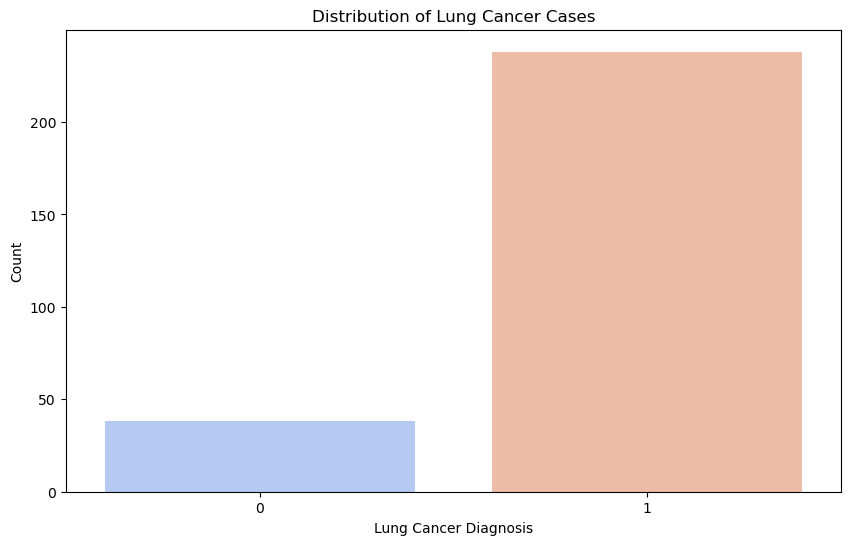

ValueError: Could not interpret value `AGE` for `y`. An entry with this name does not appear in `data`.

In [519]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adjusting figure size for visualizations
plt.rcParams['figure.figsize'] = (10, 6)

# Check the distribution of lung cancer cases
sns.countplot(x='LUNG_CANCER', data=df, palette="coolwarm")
plt.title("Distribution of Lung Cancer Cases")
plt.xlabel("Lung Cancer Diagnosis")
plt.ylabel("Count")
plt.show()

# Visualize Age Distribution for Patients with Lung Cancer
sns.boxplot(x='LUNG_CANCER', y='AGE', data=df, palette="coolwarm")
plt.title("Age Distribution by Lung Cancer Diagnosis")
plt.xlabel("Lung Cancer Diagnosis")
plt.ylabel("Age")
plt.show()

# Correlation Heatmap for Numeric Features
plt.figure(figsize=(12, 8))
numeric_df = df.drop(columns=["GENDER", "LUNG_CANCER"])  # Removing non-numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap for Numeric Features")
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/mnt/data/survey lung cancer.csv"
df = pd.read_csv(file_path)

# Drop non-numeric columns
numeric_df = df.drop(columns=["GENDER", "LUNG_CANCER"])

# Set up the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap for Numeric Features")
plt.show()


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Example text preprocessing
def preprocess_text(text, tokenizer, max_length=100):
    # Tokenize the text
    sequences = tokenizer.texts_to_sequences([text])
    # Pad sequences to ensure uniform input length
    padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')
    return padded_sequences

# Example tokenizer
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(["example symptom description"])
processed_text = preprocess_text("shortness of breath and chest pain", tokenizer)


In [819]:
pip install skl2onnx


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.3/300.3 kB 677.8 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 2.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 3.2 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.17.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.20.2 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [823]:
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

# Определение типов входных данных
initial_type = [('float_input', FloatTensorType([None, len(model.feature_names_in_)]))]

# Конвертация модели в ONNX
onnx_model = convert_sklearn(model, initial_types=initial_type)

# Сохранение модели
with open("lung_cancer.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

print("Модель успешно конвертирована в формат .onnx и сохранена как 'lung_cancer.onnx'")
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Пример создания модели в формате Keras
model = Sequential([
    Dense(10, activation='relu', input_shape=(input_dim,)),
    Dense(1, activation='sigmoid')
])

# Компиляция модели
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Тренировка модели
model.fit(X_train, y_train, epochs=10)

# Конвертация модели в TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Сохранение модели
with open('lung_cancer.tflite', 'wb') as f:
    f.write(tflite_model)

print("Модель успешно конвертирована в формат .tflite")


Модель успешно конвертирована в формат .onnx и сохранена как 'lung_cancer.onnx'


NameError: name 'input_dim' is not defined